In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from numpy.lib.npyio import load
from keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from tensorflow.keras import layers
modelo_3_1=load_model("/content/drive/MyDrive/Colab Notebooks/clasificacion imagenes Redes neuronales/save_model/best_model_3_1.keras")

In [7]:
import numpy as np
import pandas as pd
train_dir = "/content/drive/MyDrive/Colab Notebooks/clasificacion imagenes Redes neuronales/dataset/train"
import pathlib
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

In [8]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into (224,224,3).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [9]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 3s 3s/step


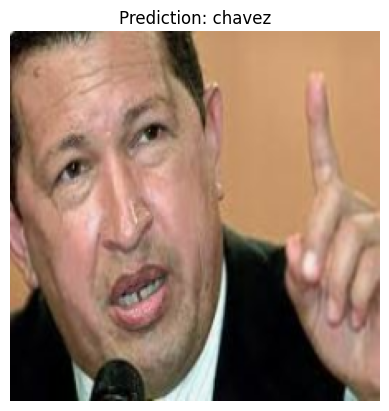

In [10]:
# Make a prediction using model_1
pred_and_plot(model=modelo_3_1,
              filename="/content/drive/MyDrive/Colab Notebooks/clasificacion imagenes Redes neuronales/imagen_personalizada/chav_001.JPG",
              class_names=class_names)